In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor


warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
test_data = pd.read_csv('test.csv', index_col=0)
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

# Поиск выбросов

In [4]:
# признак  | значения
def printValues(data = data):
    for col in data: #[['model', 'transmission', 'fuelType']]:
        values = data[col].unique()
        str_values = str(values)
        if len(str_values) > 300:
            str_values = str_values[:200] + '...'
        print(col, ':', len(values), '\n', str_values, '\n')
        
printValues()

Gender : 2 
 ['Female' 'Male'] 

Senior : 2 
 [0 1] 

Married : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['Yes' 'No'] 

Tenure : 73 
 [67 34 72 63 69  3 68  2 19 41 54 36 10 12 18 38 65  8  9 35 44  1 16 70
 57 47 33 24 55 43 11 71 60 15  7 66 17 58 23  6 14 48 39 50 13 52 27 37
 26  5 30 51 29 46 45 49 21 56 22 64 25 61  4 53 32 40 28 59 62 31 20 42
  0] 

Phone : 2 
 ['No' 'Yes'] 

MultiplePhones : 3 
 ['No phone service' 'Yes' 'No'] 

Internet : 3 
 ['DSL' 'Fiber optic' 'No'] 

Security : 3 
 ['Yes' 'No' 'No internet service'] 

Backup : 3 
 ['Yes' 'No' 'No internet service'] 

Insurance : 3 
 ['Yes' 'No' 'No internet service'] 

Support : 3 
 ['Yes' 'No' 'No internet service'] 

TV : 3 
 ['Yes' 'No' 'No internet service'] 

Movies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Two year' 'One year' 'Month-to-month'] 

EBilling : 2 
 ['No' 'Yes'] 

PaymentMethod : 4 
 ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check'] 

MonthlyCharges :

## Проверка валидности 'No internet service'

In [5]:
NO_INTERNET_SERVICE = 'No internet service'

no_internet_rows = (data['Security'] == NO_INTERNET_SERVICE) | \
    (data['Backup'] == NO_INTERNET_SERVICE) | \
    (data['Insurance'] == NO_INTERNET_SERVICE) | \
    (data['Security'] == NO_INTERNET_SERVICE) | \
    (data['Support'] == NO_INTERNET_SERVICE) | \
    (data['TV'] == NO_INTERNET_SERVICE) | \
    (data['Movies'] == NO_INTERNET_SERVICE)
    
assert len(data[data['Internet'] == 'No'][~no_internet_rows]) == 0
assert len(data[data['Internet'] != 'No'][no_internet_rows]) == 0


# Подготовка данных


## Замена на 0/1

In [6]:
def toBoolean(cols, true = 'Yes'):
    for col in cols:
        if data[col].dtype != int:
            data[col] = ((data[col] == 'Yes')).astype(int)

In [7]:
# toBoolean(['Gender'], true='Male')
# toBoolean(['Married', 'Dependents', 'Phone', 'EBilling'], true='Yes')

In [8]:
printValues()

Gender : 2 
 ['Female' 'Male'] 

Senior : 2 
 [0 1] 

Married : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['Yes' 'No'] 

Tenure : 73 
 [67 34 72 63 69  3 68  2 19 41 54 36 10 12 18 38 65  8  9 35 44  1 16 70
 57 47 33 24 55 43 11 71 60 15  7 66 17 58 23  6 14 48 39 50 13 52 27 37
 26  5 30 51 29 46 45 49 21 56 22 64 25 61  4 53 32 40 28 59 62 31 20 42
  0] 

Phone : 2 
 ['No' 'Yes'] 

MultiplePhones : 3 
 ['No phone service' 'Yes' 'No'] 

Internet : 3 
 ['DSL' 'Fiber optic' 'No'] 

Security : 3 
 ['Yes' 'No' 'No internet service'] 

Backup : 3 
 ['Yes' 'No' 'No internet service'] 

Insurance : 3 
 ['Yes' 'No' 'No internet service'] 

Support : 3 
 ['Yes' 'No' 'No internet service'] 

TV : 3 
 ['Yes' 'No' 'No internet service'] 

Movies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Two year' 'One year' 'Month-to-month'] 

EBilling : 2 
 ['No' 'Yes'] 

PaymentMethod : 4 
 ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check'] 

MonthlyCharges :

<AxesSubplot:>

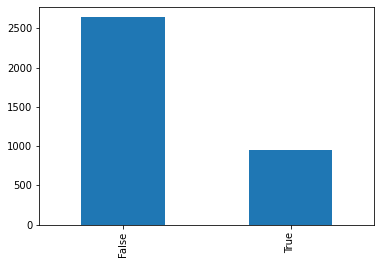

In [9]:
data['Churn'].value_counts().plot(kind='bar')

In [10]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
1619,0,37,20.35
2394,1,1,76.45
2113,0,62,24.80
716,0,67,19.80
2060,0,6,94.05


In [11]:
data.TotalCharges.value_counts().head(10)

19.55    6
20.2     6
         6
45.3     4
20.05    4
19.9     4
20.5     4
20.3     4
55.7     3
69.6     3
Name: TotalCharges, dtype: int64

In [12]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [13]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
2647,0,47,20.45,943.00
2078,1,27,81.45,2122.05
1250,0,54,87.10,4735.20
3440,0,54,109.75,6110.20
581,0,14,80.45,1072.00


In [14]:
# новый признак
#data['AverageCharges'] = data.TotalCharges / data.Tenure
# data['DiffCharges'] = ((data.MonthlyCharges - data.AverageCharges) > 0) + 0
def add_priznak(data=data):
    data['MarriedDependents'] = ((data.Married != 'Yes') & (data.Dependents == 'Yes')) + 0

    data['SeniorDependents'] = ((data.Senior == 1) & (data.Dependents == 'Yes')) + 0

add_priznak(data)
add_priznak(test_data)

In [15]:
# data['Churn'] = data['Churn'] | (data.SeniorDependents == 1)

In [16]:
data[data.Tenure == 0]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MarriedDependents,SeniorDependents
Index,,,,,,,,,,,,,,,,,,,,,
1302,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,False,0,0
1436,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,False,1,0
1486,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,False,0,0
2578,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,False,0,0
3037,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,0.0,False,0,0
3247,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,False,0,0


In [17]:
replaces = {'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Dependents': {'Yes': 1, 'No': 0},
                     
                     'Phone': {'Yes': 1, 'No': 0}, 
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0}, 
                     
                     'Internet': {'Fiber optic': 2, 'DSL': 1, 'No': 0},
                     'Security': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     'Support': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     'TV': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
                     
                     'Contract': {'Month-to-month': 1, 'One year': 12, 'Two year': 24}, 
                     
                     'EBilling': {'Yes': 1, 'No': 0},
                     'PaymentMethod': {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}
                    }

data = data.replace(replaces)
test_data = test_data.replace(replaces)

In [18]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,MarriedDependents,SeniorDependents
Index,,,,,,,,,,,,,,,,,,,,,
624,1,0,0,0,2,1,0,1,0,1,...,1,0,0,1,1,1,55.05,102.75,0,0
154,0,0,1,1,41,1,1,1,0,1,...,0,1,0,12,0,1,68.50,2839.95,0,0
2973,0,1,1,0,24,0,0,1,1,0,...,0,0,1,1,0,1,39.10,971.30,0,0
732,0,0,0,0,69,0,0,1,0,1,...,0,0,0,12,1,1,35.75,2492.25,0,0
1460,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,24.70,24.70,1,0


In [19]:
data

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MarriedDependents,SeniorDependents
Index,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,0,1,1,1,...,1,0,24,0,1,54.20,3623.95,False,0,0
1,1,0,0,0,34,1,1,1,1,1,...,0,0,12,1,0,64.40,2088.75,True,0,0
2,1,1,1,0,72,1,1,2,1,1,...,0,0,24,1,1,96.60,6827.50,False,0,0
3,1,0,1,1,63,1,0,1,1,1,...,0,0,24,0,0,63.55,4014.20,False,0,0
4,0,0,1,1,69,1,1,2,0,1,...,1,0,12,0,1,95.75,6511.25,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,1,0,0,0,5,1,0,2,0,0,...,1,0,1,0,0,80.20,384.25,False,0,0
3587,1,0,1,1,71,1,0,1,1,0,...,1,1,24,0,1,77.55,5574.35,False,0,0
3588,1,0,1,0,68,1,1,2,0,1,...,0,0,12,0,1,86.45,5762.95,False,0,0


<AxesSubplot:>

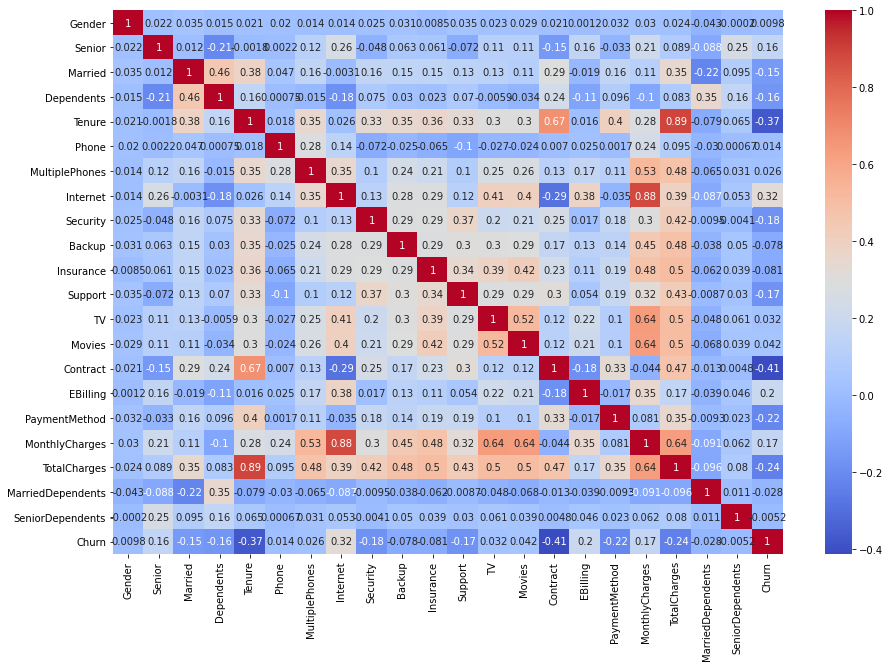

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.25,
                                                    random_state = 1)


In [22]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_train)


              precision    recall  f1-score   support

       False       0.73      1.00      0.84      1967
        True       0.00      0.00      0.00       726

    accuracy                           0.73      2693
   macro avg       0.37      0.50      0.42      2693
weighted avg       0.53      0.73      0.62      2693



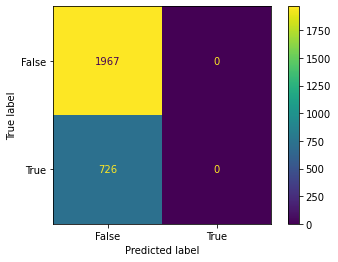

In [23]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print (classification_report(Y_train, dummy_predictions))

plot_confusion_matrix(estimator=dummy, X= X_train, y_true=Y_train)

              precision    recall  f1-score   support

       False       0.75      1.00      0.86       672
        True       0.00      0.00      0.00       226

    accuracy                           0.75       898
   macro avg       0.37      0.50      0.43       898
weighted avg       0.56      0.75      0.64       898



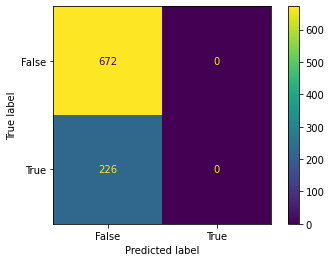

In [24]:
print (classification_report(Y_test, dummy.predict(X_test)))

plot_confusion_matrix(estimator=dummy, X= X_test, y_true=Y_test)

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1967
        True       1.00      0.99      1.00       726

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



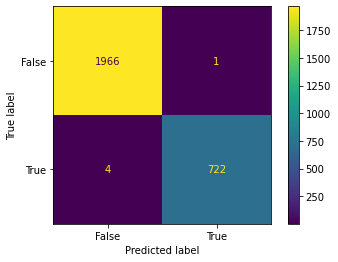

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))
plot_confusion_matrix(estimator = dt, X= X_train, y_true=Y_train)


In [26]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

# plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

Tree depth: 28


<Figure size 5000x4000 with 0 Axes>

Test evaluation
              precision    recall  f1-score   support

       False       0.83      0.82      0.82       672
        True       0.48      0.50      0.49       226

    accuracy                           0.74       898
   macro avg       0.66      0.66      0.66       898
weighted avg       0.74      0.74      0.74       898



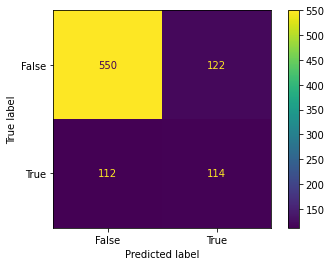

In [27]:
dt_test_predictions = dt.predict (X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))

plot_confusion_matrix(estimator = dt, X= X_test, y_true=Y_test)

In [28]:
#smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
smart_dt = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 100).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
print(classification_report(Y_train, sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))


Tree depth: 13
Train evaluation
              precision    recall  f1-score   support

       False       0.87      0.93      0.90      1967
        True       0.76      0.62      0.69       726

    accuracy                           0.85      2693
   macro avg       0.82      0.78      0.79      2693
weighted avg       0.84      0.85      0.84      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.83      0.91      0.87       672
        True       0.63      0.45      0.53       226

    accuracy                           0.80       898
   macro avg       0.73      0.68      0.70       898
weighted avg       0.78      0.80      0.78       898



БЫЛО Test evaluation

       False       0.83      0.89      0.86       672
        True       0.58      0.46      0.52       226

In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [30]:
grid.best_score_

0.6743033783343085

In [31]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 9}

In [32]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))

print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.87      0.93      0.90      1967
        True       0.77      0.63      0.69       726

    accuracy                           0.85      2693
   macro avg       0.82      0.78      0.80      2693
weighted avg       0.84      0.85      0.84      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.82      0.90      0.86       672
        True       0.58      0.42      0.48       226

    accuracy                           0.78       898
   macro avg       0.70      0.66      0.67       898
weighted avg       0.76      0.78      0.76       898



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 10, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


Train evaluation
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1967
        True       0.65      0.54      0.59       726

    accuracy                           0.80      2693
   macro avg       0.74      0.72      0.73      2693
weighted avg       0.79      0.80      0.79      2693



In [34]:

lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))


Test evaluation
              precision    recall  f1-score   support

       False       0.86      0.91      0.88       672
        True       0.67      0.55      0.60       226

    accuracy                           0.82       898
   macro avg       0.76      0.73      0.74       898
weighted avg       0.81      0.82      0.81       898



In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
rfr_train_predictions = model.predict(X_train) > 0.5

print('Train evaluation')
print(classification_report(Y_train, rfr_train_predictions))

rfr_predictions = model.predict(X_test) > 0.5

print('Test evaluation')
print(classification_report(Y_test, rfr_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1967
        True       1.00      1.00      1.00       726

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       672
        True       0.62      0.49      0.55       226

    accuracy                           0.80       898
   macro avg       0.73      0.69      0.71       898
weighted avg       0.78      0.80      0.79       898



In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model = LassoCV()

model.fit(X_train_scaled, Y_train)
lasso_train_predictions = model.predict(X_train_scaled) > 0.5

print('Train evaluation')
print(classification_report(Y_train, lasso_train_predictions))

lasso_test_predictions = model.predict(X_test_scaled) > 0.5

print('Test evaluation')
print(classification_report(Y_test, lasso_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1967
        True       0.68      0.49      0.57       726

    accuracy                           0.80      2693
   macro avg       0.75      0.70      0.72      2693
weighted avg       0.79      0.80      0.79      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.93      0.88       672
        True       0.69      0.48      0.57       226

    accuracy                           0.81       898
   macro avg       0.76      0.70      0.72       898
weighted avg       0.80      0.81      0.80       898



In [37]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Churn
Index,
783,False
2376,False
3295,False
2527,False
1490,True


In [38]:
## DecisionTreeClassifier
matthews_corrcoef(Y_test, dt_test_predictions)

# 0.3104664750197529

0.3183399795677574

In [39]:
# GridSearchCV
matthews_corrcoef(Y_test, gbm_test_predictions)

# 0.35699290062035866

0.3526901578086

In [40]:
# RandomForestRegressor
matthews_corrcoef(Y_test, rfr_predictions)

# 0.42220335775146667

0.42220335775146667

In [41]:
# LassoCV
matthews_corrcoef(Y_test, lasso_test_predictions)

# 0.4637326264022254

0.4637326264022254

In [42]:
# LogisticRegression
matthews_corrcoef(Y_test, lr_test_predictions)

# 0.48876282691470774

0.48876282691470774

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 2, n_jobs = -1)


lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)

# LogisticRegression
print(matthews_corrcoef(Y_test, lr_test_predictions))

print(0.48876282691470774)

Test evaluation
0.48876282691470774
0.48876282691470774


In [44]:
# test_data

In [45]:
lr_result_predictions = lr.predict(test_data)

df = pd.DataFrame({'Churn': lr_result_predictions})
df.to_csv('submission.csv',index_label="Index")